In [2]:
'''
UTFPR - Cornélio Procópio
Disciplina: INTELIGÊNCIA ARTIFICIAL
Trabalho de Deep Learning
Aluno: Leonardo Batista
RA: 1885189
'''
#####################################################
##################### PRÁTICA 2 #####################
####################################################

#DEPENDENCIAS NECESSÁRIAS
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#INCIA O PATH COM IMAGENS DE TREINO
trdata = ImageDataGenerator()
#DEFININDO GERADOR DE IMAGENS DE TREINO
traindata = trdata.flow_from_directory('C:/Users/leonardo/Documents/Nova pasta/afhq/train/', target_size=(32,32), class_mode='categorical', batch_size=32)

#INICIA O PATH COM IMAGEM DE TESTE
tsdata = ImageDataGenerator()
#DEFININDO GERADOR DE IMAGENS DE TESTE
testdata = tsdata.flow_from_directory('C:/Users/leonardo/Documents/Nova pasta/afhq/val/', target_size=(32,32), class_mode='categorical', batch_size=16)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [4]:
#CARREGANDO MODELO VGG16 COM OS PESOS APRENDIDOS NO TREINO IMAGENET E SEM CAMANDA DENSA (include_top = False)
VGG = tf.keras.applications.VGG16(input_shape=(32,32,3), include_top = False, weights= 'imagenet', pooling='max')

#NOVA CONFIGURAÇÃO PARA O MODELO

pp_function = tf.keras.applications.vgg16.preprocess_input
x = Flatten()(VGG.output)
#ADICIONA APÓS O x OS NEURONIOS QUE DEVEM SER UTILIZADOS
x = Dropout(0.5)(x)
#ADICIONA APÓS O x 3 NEURONIOS (3 CLASSES) COM FUNÇÃO DE ATIVAÇÃO SOFTMAX (DISTRIBUIÇÃO DE PROBABILIDADE)
x = Dense(3,activation = 'softmax')(x)
#DEFINE MODELO FINAL
model = Model(inputs = VGG.input, outputs = x)

In [5]:
#CONGELANDO OS NEURONIOS JÁ TREINADOS NA IMAGENET (TREINAR APENAS AS ÚLTIMAS CAMADAS)
for l in model.layers:
  if l.name.split('_')[0] != 'dense':
    l.trainable=False
  else:
    l.trainable=True
    
#DEFININDO STEPS
step_size_train = traindata.n//traindata.batch_size
step_size_test = testdata.n//testdata.batch_size

#TAXA DE OTIMIZAÇÃO    
learning = Adam(lr=0.001)
model.compile(optimizer=learning, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#TREINANDO E TESTANDO O MODELO
hist = model.fit(traindata,
                 steps_per_epoch=step_size_train,
                 epochs = 120,
                 validation_data = testdata,
                 validation_steps=step_size_test)

Epoch 1/120
 62/457 [===>..........................] - ETA: 1:17 - loss: 19.9151 - accuracy: 0.4232

In [ ]:
results = model.evaluate_generator(testdata, 15)
print('Acc: %.3f, Loss: %.3f' % (results[1], results[0]))

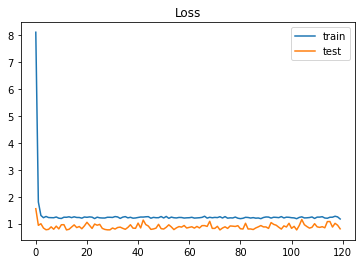

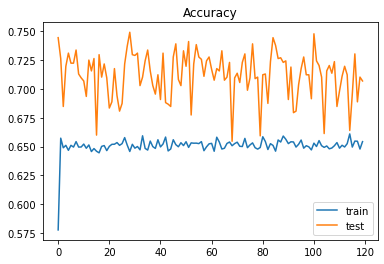

In [17]:
#APRESENTANDO O RESULTADO EM GRÁFICOS (LOSS E ACCURACY)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()
print()
print()
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

----------------CLASSIFICATION--------------
              precision    recall  f1-score   support

           0       0.31      0.36      0.34       500
           1       0.37      0.31      0.34       500
           2       0.34      0.34      0.34       500

    accuracy                           0.34      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.34      0.34      0.34      1500

----------------Matrix de Confusão--------------


<AxesSubplot:>

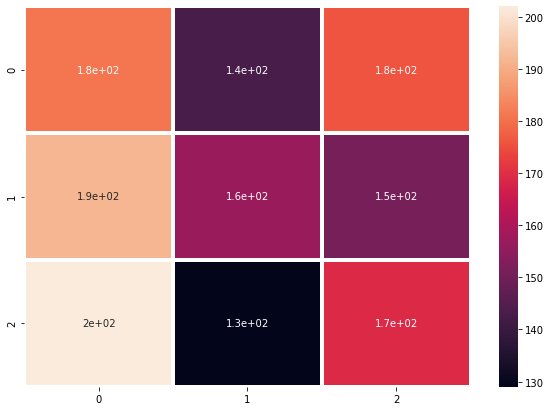

In [22]:
#CRIANDO GRÁFICO PARA VISUALIZAÇÃO DA MATRIZ DE CONFUSÃO E CLASSIFICAÇÃO (PRECISÃO, RECALL, F1-SCORE)
predictions = model.predict_generator(testdata)
y_pred = np.argmax(predictions, axis=1)
classification = classification_report(testdata.classes, y_pred)
print('----------------CLASSIFICATION--------------')
print(classification)
print('----------------Matrix de Confusão--------------')
matrix = confusion_matrix(testdata.classes, y_pred)
df_cm = pd.DataFrame(matrix, index = [i for i in range(3)],
                  columns = [i for i in range(3)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidths=2.5)